In [ ]:
from keras.datasets import imdb
from keras.datasets import imdb

# Load the data, keeping only the 10,000 most frequently occurring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:


# Find the maximum word index in each review
max_indexes = [max(sequence) for sequence in train_data]

# Find the highest index among all reviews
max_index = max(max_indexes)
print("Max word index:", max_index)


Max word index: 9999


In [ ]:
import textwrap
from keras.datasets import imdb

In [ ]:
# Load dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
# Load the word index
word_index = imdb.get_word_index()

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Reverse word index to map integers to words
reverse_word_index = {value: key for (key, value) in word_index.items()}

In [ ]:
# Decode the first review
decoded_review = "".join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [ ]:
# Format and print the decoded review
print("Decoded Review:\n")
print(textwrap.fill(decoded_review, width=80)) # Wrap text for better readability

Decoded Review:

?thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysui
tedtheparttheyplayedandyoucouldjustimaginebeingthererobert?isanamazingactorandno
wthesamebeingdirector?fathercamefromthesamescottishislandasmyselfsoilovedthefact
therewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwa
sjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor?andwouldrecommend
ittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyou
knowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso?tothetw
olittleboy'sthatplayedthe?ofnormanandpaultheywerejustbrilliantchildrenareoftenle
ftoutofthe?listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofilefort
hewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'ty
outhinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwa
ssharedwithusall


In [ ]:
import numpy as np

# Function to vectorize sequences
def vectorize_sequences(sequences, dimension=10000):
   results = np.zeros((len(sequences), dimension))
   for i, sequence in enumerate(sequences):
     results[i, sequence] = 1 # Set specific indices to 1
   return results

In [ ]:
# Vectorize training and testing data
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [ ]:
# Convert labels to float32
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [ ]:
# Check shape of X_train
print("X_train shape:", X_train.shape)

#X_train shape: (25000, 10000) # This line was causing the error due to unexpected indentation. It's now commented out.

X_train shape: (25000, 10000)


In [ ]:
from keras import models, layers, optimizers, losses

In [ ]:
# Define the model
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(100000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
]) # removed extra line with incorrect indentation

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
# Compile the model
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss=losses.binary_crossentropy,
    metrics=['accuracy']
)
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss=losses.binary_crossentropy,
    metrics=['accuracy']
)

In [ ]:
# Create validation set
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

In [ ]:
# Create validation labels
y_val = y_train[:10000]
partialy_train = y_train[10000:]

In [ ]:
# Create validation labels
y_val = y_train[:10000]
partial_y_train = y_train[10000:] # Corrected the variable name to partial_y_train

In [ ]:
# Define the model
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)), # Changed input_shape to (10000,)
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    partial_X_train, partial_y_train,
    epochs=20, batch_size=512,
    validation_data=(X_val, y_val)
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.6814 - loss: 0.5979 - val_accuracy: 0.8608 - val_loss: 0.3985
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8960 - loss: 0.3410 - val_accuracy: 0.8858 - val_loss: 0.3161
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9288 - loss: 0.2368 - val_accuracy: 0.8894 - val_loss: 0.2837
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9381 - loss: 0.1927 - val_accuracy: 0.8840 - val_loss: 0.2868
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9482 - loss: 0.1592 - val_accuracy: 0.8813 - val_loss: 0.2933
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9626 - loss: 0.1279 - val_accuracy: 0.8850 - val_loss: 0.2852
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9726 - loss: 0.1036 - val_accuracy: 0.8817 - val_loss: 0.2999
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9774 - loss: 0.0908 - val_accuracy: 0.8844 - v

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history

In [ ]:
#Extract loss values
loss_values = history_dict['loss'] # Changed 'history_dictUlossl' to 'history_dict['loss']'
val_loss_values = history_dict['val_loss']

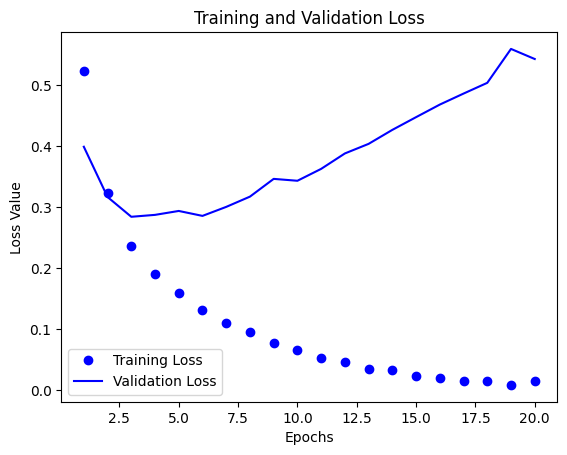

In [ ]:
#Plot losses
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

In [ ]:
#Extract accuracy values
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

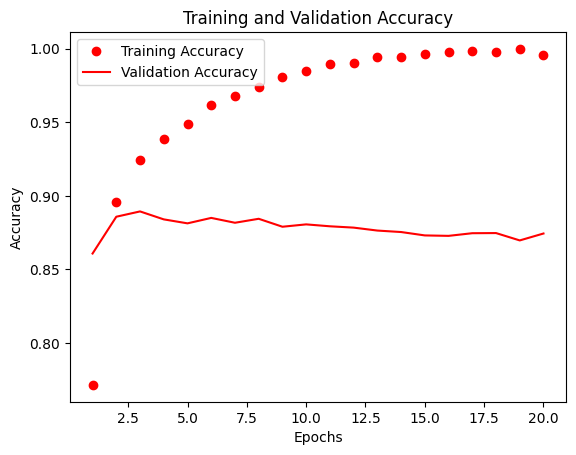

In [ ]:
#Plot accuracy
plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.fit(
    partial_X_train, partial_y_train,
    epochs=3, batch_size=512,
    validation_data=(X_val, y_val)
)


Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.9999 - loss: 0.0050 - val_accuracy: 0.8736 - val_loss: 0.5632
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9996 - loss: 0.0053 - val_accuracy: 0.8730 - val_loss: 0.5738
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9999 - loss: 0.0038 - val_accuracy: 0.8745 - val_loss: 0.5988


In [ ]:
np.set_printoptions(suppress=True) # Suppress scientific notation
result = model.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Convert probabilities to 0 or 1
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = 1 if score > 0.5 else 0

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.13732
